In [23]:
#import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets  import load_boston

%matplotlib inline

In [34]:
boston_dataset = load_boston()
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston['Price'] = boston_dataset.target
df_boston.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [162]:
df_heatmap = pd.DataFrame({"CRIME":df_boston['CRIM'],"Price":df_boston['Price'],'PTRATIO':df_boston['PTRATIO']})
df_heatmap.head(5)


CRIME  PTRATIO  Price
0  0.00632     15.3   24.0
1  0.02731     17.8   21.6
2  0.02729     17.8   34.7
3  0.03237     18.7   33.4
4  0.06905     18.7   36.2

In [172]:
df_heatmap.drop_duplicates(['PTRATIO'])


CRIME  PTRATIO  Price
0    0.00632     15.3   24.0
1    0.02731     17.8   21.6
3    0.03237     18.7   33.4
6    0.08829     15.2   22.9
13   0.62976     21.0   20.4
35   0.06417     19.2   18.9
39   0.02763     18.3   30.8
41   0.12744     17.9   26.6
50   0.08873     16.8   19.7
54   0.01360     21.1   18.9
56   0.02055     17.3   24.7
57   0.01432     15.1   31.6
58   0.15445     19.7   23.3
64   0.01951     18.6   33.0
65   0.03584     16.1   23.5
67   0.05789     18.9   22.0
80   0.04113     19.0   28.0
84   0.05059     18.5   23.9
92   0.04203     18.2   22.9
95   0.12204     18.0   28.4
100  0.14866     20.9   27.5
120  0.06899     19.1   22.0
127  0.25915     21.2   16.2
142  3.32105     14.7   13.4
172  0.13914     16.6   23.1
193  0.02187     15.6   31.1
195  0.01381     14.4   50.0
196  0.04011     12.6   33.3
199  0.03150     17.0   34.9
216  0.04560     16.4   23.3
220  0.35809     17.4   26.7
256  0.01538     15.9   44.0
257  0.61154     13.0   50.0
274  0.05644     17.6   32.4
279  0.21038     14.9   35.1
283  0.01501     13.6   50.0
293  0.08265     16.0   23.9
298  0.06466     14.8   22.5
304  0.05515     18.4   36.1
320  0.16760     19.6   23.8
328  0.06617     16.9   19.3
333  0.05083     20.2   22.2
341  0.01301     15.5   32.7
345  0.03113     18.8   17.5
354  0.04301     22.0   18.2
488  0.15086     20.1   15.2

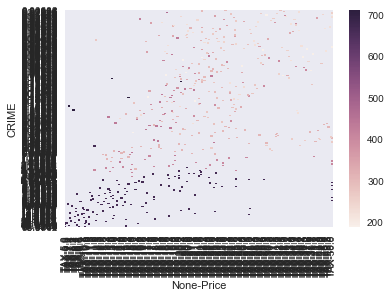

In [73]:
sns.heatmap(df_heatmap)

In [88]:
passenger_df = pd.read_csv('/Users/philips/Documents/python_ds/dataset/train.csv',low_memory=False)
passenger_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [315]:
df_titanic = pd.DataFrame({"SEX":passenger_df['Sex'],"AGE":passenger_df['Age'],'SURVIVED':passenger_df['Survived']})
df_titanic.head(5)

AGE     SEX  SURVIVED
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0

In [277]:
df_titanic = df_titanic.dropna(axis=0, how='any')
df_titanic.reset_index()
df_titanic = df_titanic.drop_duplicates(subset=['AGE', 'SEX'],keep='first',inplace=True)
df_titanic.head(10)

AttributeError: 'NoneType' object has no attribute 'dropna'

In [322]:
#df_titanic.pivot('AGE','SEX','SURVIVED')
pv = pd.pivot_table(df_titanic[1:25], index = 'AGE',columns = 'SEX',
                             values = 'SURVIVED' , fill_value = 0)
pv

SEX   female  male
AGE               
2.0      0.0     0
4.0      1.0     0
8.0      0.0     0
14.0     0.5     0
15.0     1.0     0
20.0     0.0     0
26.0     1.0     0
27.0     1.0     0
28.0     0.0     1
31.0     0.0     0
34.0     0.0     1
35.0     1.0     0
38.0     1.0     0
39.0     0.0     0
54.0     0.0     0
55.0     1.0     0
58.0     1.0     0

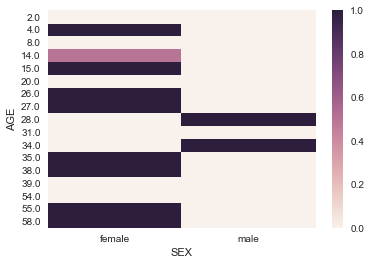

In [323]:
sns.heatmap(pv)

In [333]:
df = pd.DataFrame({'foo': ['one','one','one','one','two','two','two','three'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C','D','C'],
                       'baz': [2, 2, 2, 4, 2, 6,7,8]})
df

bar  baz    foo
0   A    2    one
1   B    2    one
2   C    2    one
3   A    4    one
4   B    2    two
5   C    6    two
6   D    7    two
7   C    8  three

In [334]:
#df.drop_duplicates(['bar','baz','foo'])
pv = pd.pivot_table(df, index = 'foo',columns = 'bar',
                             values = 'baz' , fill_value = 0)
pv

bar    A  B  C  D
foo              
one    3  2  2  0
three  0  0  8  0
two    0  2  6  7

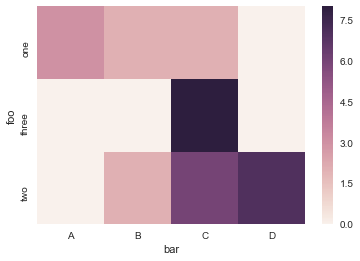

In [336]:
sns.heatmap(pv)

In [337]:
df = pd.DataFrame({"Month":["Jan", "Feb", "March", "April","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                   "Year":[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015], "Fliers":[100,200,220,150,220,270,330,320,100,90,333,350]})
df

Fliers  Month  Year
0      100    Jan  2004
1      200    Feb  2005
2      220  March  2006
3      150  April  2007
4      220    May  2008
5      270   June  2009
6      330   July  2010
7      320    Aug  2011
8      100    Sep  2012
9       90    Oct  2013
10     333    Nov  2014
11     350    Dec  2015

In [338]:
pv = pd.pivot_table(df, index = 'Month',columns = 'Year',
                             values = 'Fliers' , fill_value = 0)
pv

Year   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015
Month                                                                        
April     0     0     0   150     0     0     0     0     0     0     0     0
Aug       0     0     0     0     0     0     0   320     0     0     0     0
Dec       0     0     0     0     0     0     0     0     0     0     0   350
Feb       0   200     0     0     0     0     0     0     0     0     0     0
Jan     100     0     0     0     0     0     0     0     0     0     0     0
July      0     0     0     0     0     0   330     0     0     0     0     0
June      0     0     0     0     0   270     0     0     0     0     0     0
March     0     0   220     0     0     0     0     0     0     0     0     0
May       0     0     0     0   220     0     0     0     0     0     0     0
Nov       0     0     0     0     0     0     0     0     0     0   333     0
Oct       0     0     0     0     0     0     0     0     0    90     0     0
Sep       0     0     0     0     0     0     0     0   100     0     0     0

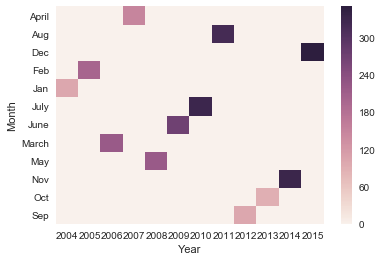

In [339]:
sns.heatmap(pv)

([<matplotlib.patches.Wedge at 0x1260ec810>,
  <matplotlib.text.Text at 0x12612b810>])

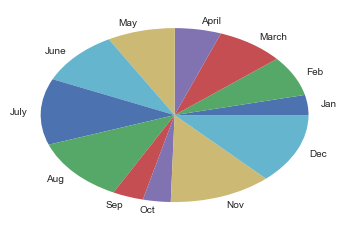

In [346]:
plt.pie(df['Fliers'],labels = df['Month'])